In [95]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="muted")

In [96]:
# hidden probabilities
means = np.array([0.3, 0.6, 0.5])


rnd = np.random.RandomState(7)

## Greedy Algorithm

In [97]:
def pull_lever(machine, means, S, F):
    # draw uniform random sample
    p = rnd.random_sample()
    if p < means[machine]:
        S[machine] += 1
    else:
        F[machine] += 1
        

In [98]:
def greedy_algorithm(num_trials, means):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## e-greedy algorithm

In [99]:
def e_greedy_algorithm(num_trials, means, epsilon=0.0):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):

        p = rnd.random_sample()
    
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # epsilon number of times choose a random machine
        if p < epsilon:
            machine = rnd.randint(0, N)
            
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## Thompson sampling

In [100]:
def thompson_algorithm(num_trials, means):
    """Thompson sampling algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = rnd.beta(S[i] + 1, F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [171]:
means = np.array([0.06, 0.00, 0.06, 0.0, 0.06])

num_trials = 10000

gS, gF = greedy_algorithm(num_trials, means)

eS, eF = e_greedy_algorithm(num_trials, means, 0.05)

tS, tF = thompson_algorithm(num_trials, means)

print(sum(gS))
print(sum(eS))
print(sum(tS))

581
618
575


In [177]:
N = len(means)

num_trials = 10

total_wins = 0

# current probabilities
probs = np.zeros(N)

# number of successes for each machine
S = np.zeros(N, dtype=np.int)

# number of failures for each machine
F = np.zeros(N, dtype=np.int)


# number of wins at each trial number
wins = np.zeros(num_trials)

for trial in range(num_trials):
    print("Trial {}".format(trial))
    for i in range(N):
        
        # draw from random sample
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
        
    print(probs)
    machine = np.argmax(probs)
    print("Playing machine {}".format(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        print(" -- win!")
        S[machine] += 1
        total_wins += 1
    else:
        print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Trial 0
[0.74220482 0.96602734 0.86509351 0.96385393 0.94223785]
Playing machine 1
 -- lose
Trial 1
[0.66576558 0.52711439 0.25677291 0.02737465 0.12462797]
Playing machine 0
 -- lose
Trial 2
[0.16359092 0.02810289 0.95894231 0.88521507 0.63796415]
Playing machine 2
 -- lose
Trial 3
[0.33455763 0.45660155 0.6800156  0.44910037 0.39892525]
Playing machine 2
 -- lose
Trial 4
[0.06431748 0.45611037 0.23259914 0.66266183 0.49481686]
Playing machine 3
 -- lose
Trial 5
[0.58980685 0.09905571 0.37949329 0.12516356 0.62534999]
Playing machine 4
 -- lose
Trial 6
[0.42956607 0.0747853  0.0446808  0.36514591 0.00633574]
Playing machine 0
 -- win!
Trial 7
[0.4766667  0.21115435 0.04299537 0.33517561 0.00741545]
Playing machine 0
 -- win!
Trial 8
[0.55374082 0.02909202 0.12165106 0.52465198 0.41067444]
Playing machine 0
 -- lose
Trial 9
[0.48146341 0.30414617 0.02200487 0.44486933 0.21496442]
Playing machine 0
 -- lose
Total wins 2


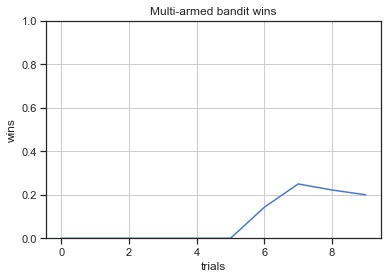

In [181]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()
ax.set_ylim([0,1.0])

# fig.savefig("test.png")
plt.show()

In [146]:
print(probs)

[0.0327601  0.07705772 0.2427083  0.3735574  0.27537369]


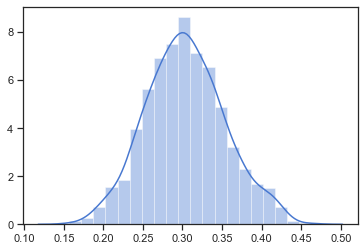

In [147]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

sns.distplot(data[4], bins=20, kde=True)

In [148]:

# sns.set(color_codes=True)
# sns.set_context('paper')  #Everything is larger


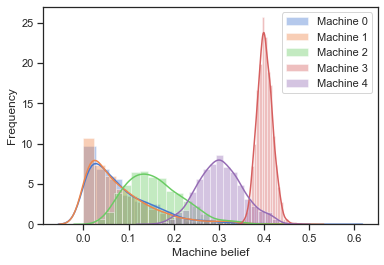

In [167]:
for i in range(N):
    ax = sns.distplot(data[i],
                     bins=20,
                     kde=True,
                     label='Machine {}'.format(i),
                     )


ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()
plt.savefig('foo.svg')

In [243]:
class Experiment(object):
    def __init__(self, priors):
        self.priors = priors
        self.N = len(priors)
        self.S = np.zeros(self.N, dtype=np.int)
        self.F = np.zeros(self.N, dtype=np.int)
        self.trials = 0
        
    def pull(self, machine):
        
        self.trials += 1
        # draw uniform random sample
        p = rnd.random_sample()
        if p < means[machine]:
            self.S[machine] += 1
        else:
            self.F[machine] += 1
            
    def solve(self, solver, n_trials):
        for i in range(n_trials):
            machine = solver(self)
            self.pull(machine)

def thompson(experiment):
    N = experiment.N
    S = experiment.S
    F = experiment.F
    
    probs = np.zeros(N)
    for i in range(N):
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
    
    return np.argmax(probs)
            
means = np.array([0.05, 0.2, 0.1])
a = Experiment(means)

a.N
a.solve(thompson, 1000)

print(a.S)
print(a.F)

[  0 167   6]
[ 24 740  63]
